In [ ]:
!pip install gdown

In [2]:
!gdown 1EW0T0PssvofiQhxlRQLs7WHfTa_h01ML


Downloading...
From (original): https://drive.google.com/uc?id=1EW0T0PssvofiQhxlRQLs7WHfTa_h01ML
From (redirected): https://drive.google.com/uc?id=1EW0T0PssvofiQhxlRQLs7WHfTa_h01ML&confirm=t&uuid=c9b38247-6cc3-4052-9ca1-a0244094910a
To: /content/Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 46.7MB/s]


In [3]:
!unzip digit.zip

unzip:  cannot find or open digit.zip, digit.zip.zip or digit.zip.ZIP.


In [4]:
pip install pillow numpy tensorflow

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = PipSession(
              ^^^^^^^^^

Task 1: Data Preparation
Loading the Data
• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:
• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

Streaming output truncated to the last 5000 lines.
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104023.png  
  inflating: /content/DevanagariHandwritte

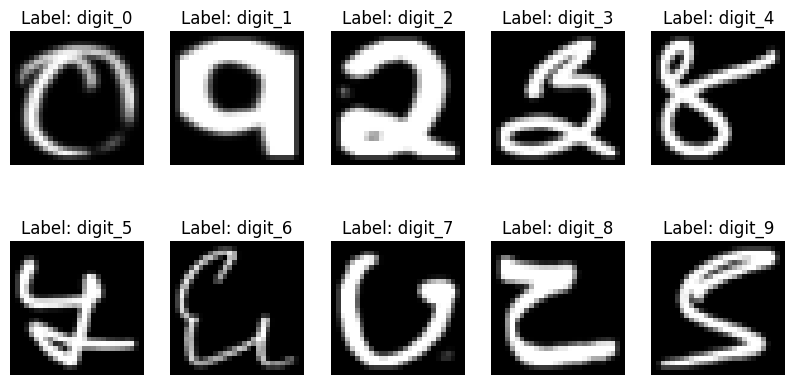

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from PIL import Image  # Import Pillow
import matplotlib.pyplot as plt

# Unzip dataset
!unzip digit.zip -d /content/

# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

# Load training and testing datasets
x_train, y_train, class_names = load_images_from_folder(train_dir)
x_test, y_test, _ = load_images_from_folder(test_dir)

# Reshape images for Keras input (adding channel dimension)
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize all digits
plt.figure(figsize=(10, 5))
for i, class_name in enumerate(class_names):
    img_index = np.where(y_train.argmax(axis=1) == i)[0][0]  # Get an index for each class
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[img_index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {class_name}")
    plt.axis("off")
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build Fully Connected Neural Network (FCN) Model
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 1)),  # Flatten input image
    Dense(64, activation='sigmoid'),  # First hidden layer with 64 neurons
    Dense(128, activation='sigmoid'),  # Second hidden layer with 128 neurons
    Dense(256, activation='sigmoid'),  # Third hidden layer with 256 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2718 - loss: 2.0059
Epoch 1: val_loss improved from inf to 6.86810, saving model to best_model.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2752 - loss: 1.9994 - val_accuracy: 0.0000e+00 - val_loss: 6.8681
Epoch 2/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.7114
Epoch 2: val_loss did not improve from 6.86810
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8099 - loss: 0.7087 - val_accuracy: 0.0000e+00 - val_loss: 7.8075
Epoch 3/20
105/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9138 - loss: 0.3120
Epoch 3: val_loss did not improve from 6.86810
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9141 - loss: 0.3111 - val_accuracy: 0.0000e+00 - val_loss: 8.3762
Epoch 4/20
100/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9466 - loss: 0.2014
Epoch 4: val_loss did not improve from 6.86810
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9466 - loss: 0.2005 - val_accuracy: 0.0000e+00 - val_loss: 8.8564
Epoch 5/20
101/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9575 - loss: 0.1538
Epoch 5: val_loss did not impr

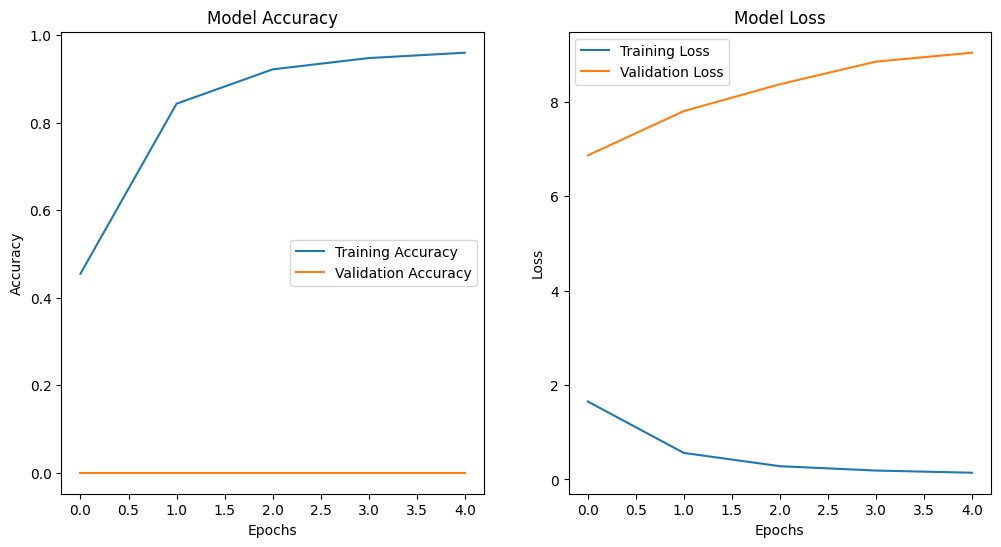

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,  # 20% of data used for validation
                    callbacks=[checkpoint_callback, early_stopping_callback],  # Include callbacks
                    verbose=1)

# After training, you can evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Optionally, plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Output the test accuracy and loss
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

94/94 - 0s - 3ms/step - accuracy: 0.6020 - loss: 2.1174
Test Loss: 2.1174
Test Accuracy: 60.20%


In [11]:
# Save the trained model to an HDF5 file
model.save("handwritten_digit_model.h5")
print("Model saved successfully!")
# Load the saved model
loaded_model = tf.keras.models.load_model("handwritten_digit_model.h5")
print("Model loaded successfully!")
# Evaluate the loaded model on the test dataset
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)

# Print the results
print(f"Loaded Model Test Accuracy: {test_acc * 100:.2f}%")
print(f"Loaded Model Test Loss: {test_loss:.4f}")


Model saved successfully!
Model loaded successfully!
94/94 - 1s - 16ms/step - accuracy: 0.6020 - loss: 2.1174
Loaded Model Test Accuracy: 60.20%
Loaded Model Test Loss: 2.1174


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


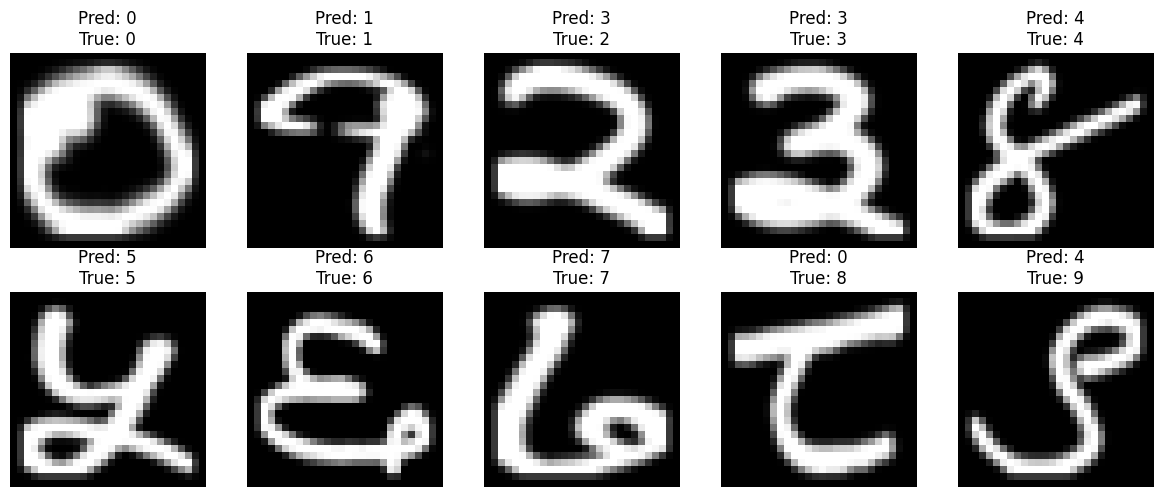

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded y_test back to class labels for comparison
true_labels = np.argmax(y_test, axis=1)

# Select one sample for each digit (0-9)
num_samples = 10
selected_indices = []

# Loop to select one sample for each digit (0-9)
for digit in range(10):
    digit_indices = np.where(true_labels == digit)[0]
    selected_index = np.random.choice(digit_indices)
    selected_indices.append(selected_index)

# Display the selected samples
plt.figure(figsize=(12, 5))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[index]}\nTrue: {true_labels[index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()